In [14]:
import os
os.listdir("/kaggle/input/brain-tumor-mri-dataset")


['Training', 'Testing']

In [15]:
import os

os.listdir("/kaggle/input/brain-tumor-mri-dataset/Training")


['pituitary', 'notumor', 'meningioma', 'glioma']

In [16]:
TRAIN_DIR = "/kaggle/input/brain-tumor-mri-dataset/Training"


In [17]:
total = 0
for cls in os.listdir(TRAIN_DIR):
    cls_path = os.path.join(TRAIN_DIR, cls)
    total += len(os.listdir(cls_path))

total


5712

In [18]:
PROMPT = "a medical brain MRI image"


In [19]:
from PIL import Image
import matplotlib.pyplot as plt
import os


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

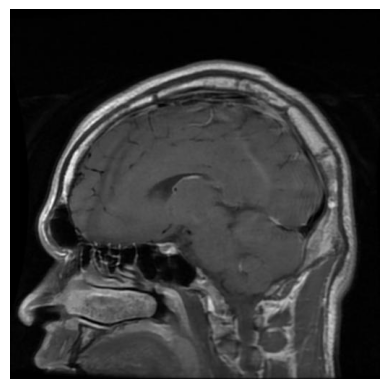

In [20]:
# pick one class
sample_class = os.listdir(TRAIN_DIR)[0]
sample_image = os.listdir(os.path.join(TRAIN_DIR, sample_class))[0]

img_path = os.path.join(TRAIN_DIR, sample_class, sample_image)
img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

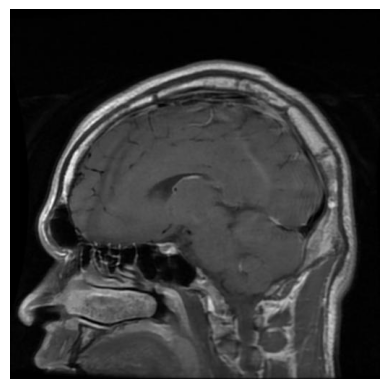

In [21]:
img_resized = img.resize((512, 512))
plt.imshow(img_resized)
plt.axis("off")


In [22]:
OUTPUT_IMAGE_DIR = "/kaggle/working/brain_mri_images"
os.makedirs(OUTPUT_IMAGE_DIR, exist_ok=True)


In [23]:
from tqdm import tqdm

count = 0

for cls in os.listdir(TRAIN_DIR):
    cls_path = os.path.join(TRAIN_DIR, cls)
    
    for img_name in tqdm(os.listdir(cls_path)):
        img_path = os.path.join(cls_path, img_name)
        try:
            img = Image.open(img_path).convert("RGB")
            img = img.resize((512, 512))
            
            save_path = os.path.join(
                OUTPUT_IMAGE_DIR,
                f"brain_{count}.png"
            )
            img.save(save_path)
            count += 1
        except:
            pass

count


100%|██████████| 1321/1321 [01:05<00:00, 20.27it/s]


5712

In [24]:
import os

len(os.listdir("/kaggle/working/brain_mri_images"))


5712

In [25]:
import json

image_files = os.listdir("/kaggle/working/brain_mri_images")

captions = []
for img in image_files:
    captions.append({
        "file_name": img,
        "text": PROMPT
    })

with open("/kaggle/working/metadata.jsonl", "w") as f:
    for item in captions:
        f.write(json.dumps(item) + "\n")


In [26]:
!head -n 3 /kaggle/working/metadata.jsonl


{"file_name": "brain_2876.png", "text": "a medical brain MRI image"}
{"file_name": "brain_2494.png", "text": "a medical brain MRI image"}
{"file_name": "brain_4458.png", "text": "a medical brain MRI image"}


In [27]:
!pip install diffusers transformers accelerate peft safetensors


In [28]:
!accelerate config default


/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

In [29]:
!git clone https://github.com/huggingface/diffusers.git


Cloning into 'diffusers'...
remote: Enumerating objects: 114905, done.
remote: Counting objects: 100% (789/789), done.
remote: Compressing objects: 100% (429/429), done.
remote: Total 114905 (delta 635), reused 360 (delta 360), pack-reused 114116 (from 3)
Receiving objects: 100% (114905/114905), 88.38 MiB | 30.34 MiB/s, done.
Resolving deltas: 100% (85802/85802), done.


In [30]:
!pip uninstall -y diffusers
!pip install git+https://github.com/huggingface/diffusers.git


Found existing installation: diffusers 0.35.2
Uninstalling diffusers-0.35.2:
  Successfully uninstalled diffusers-0.35.2
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-jyacmg5h
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-jyacmg5h
  Resolved https://github.com/huggingface/diffusers.git to commit f6b6a7181eb44f0120b29cd897c129275f366c2a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.36.0.dev0-py3-none-any.whl size=4730455 sha256=587d3fa610d12f48e71a9ebe1498431a7d15b15be51b46efb6726acafbcf93ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-jnnpytag/wheels/23/0f/7d/f97813d265ed0e599a78d83afd4e1925740896ca79b46cccfd
Successfully built diffusers


In [31]:
import json

with open("metadata.jsonl", "r") as f:
    first_line = json.loads(f.readline())

first_line




{'file_name': 'brain_2876.png', 'text': 'a medical brain MRI image'}

In [32]:
import json
import os

INPUT_META = "/kaggle/working/metadata.jsonl"
OUTPUT_META = "/kaggle/working/metadata_fixed.jsonl"

with open(INPUT_META, "r") as fin, open(OUTPUT_META, "w") as fout:
    for line in fin:
        item = json.loads(line)

        new_item = {
            "image": os.path.join("brain_mri_images", item["file_name"]),
            "text": item["text"]
        }

        fout.write(json.dumps(new_item) + "\n")

print("metadata_fixed.jsonl created")


metadata_fixed.jsonl created


In [33]:
!head -n 3 /kaggle/working/metadata_fixed.jsonl


{"image": "brain_mri_images/brain_2876.png", "text": "a medical brain MRI image"}
{"image": "brain_mri_images/brain_2494.png", "text": "a medical brain MRI image"}
{"image": "brain_mri_images/brain_4458.png", "text": "a medical brain MRI image"}


In [34]:
import json
import os

IMAGE_DIR = "/kaggle/working/brain_mri_images"
META_PATH = "/kaggle/working/metadata.jsonl"

with open(META_PATH, "w") as f:
    for img_name in os.listdir(IMAGE_DIR):
        item = {
            "image": os.path.join("brain_mri_images", img_name),
            "text": "a medical brain MRI image"
        }
        f.write(json.dumps(item) + "\n")

print("metadata.jsonl rebuilt correctly")




metadata.jsonl rebuilt correctly


In [35]:
!head -n 3 /kaggle/working/metadata.jsonl


{"image": "brain_mri_images/brain_2876.png", "text": "a medical brain MRI image"}
{"image": "brain_mri_images/brain_2494.png", "text": "a medical brain MRI image"}
{"image": "brain_mri_images/brain_4458.png", "text": "a medical brain MRI image"}


In [36]:
import json
import os

IMAGE_DIR = "/kaggle/working/brain_mri_images"
META_PATH = "/kaggle/working/metadata.jsonl"

with open(META_PATH, "w") as f:
    for img_name in os.listdir(IMAGE_DIR):
        item = {
            "file_name": os.path.join("brain_mri_images", img_name),  # required by HF loader
            "text": "a medical brain MRI image"
        }
        f.write(json.dumps(item) + "\n")

print("metadata.jsonl rebuilt with file_name (HF-compatible)")


metadata.jsonl rebuilt with file_name (HF-compatible)


In [37]:
!head -n 3 /kaggle/working/metadata.jsonl


{"file_name": "brain_mri_images/brain_2876.png", "text": "a medical brain MRI image"}
{"file_name": "brain_mri_images/brain_2494.png", "text": "a medical brain MRI image"}
{"file_name": "brain_mri_images/brain_4458.png", "text": "a medical brain MRI image"}


In [38]:
import json
import os

IMAGE_DIR = "/kaggle/working/brain_mri_images"
META_PATH = "/kaggle/working/metadata.jsonl"

with open(META_PATH, "w") as f:
    for img_name in os.listdir(IMAGE_DIR):
        item = {
            "file_name": os.path.join("brain_mri_images", img_name),  # HF needs this
            "image": os.path.join("brain_mri_images", img_name),      # Diffusers needs this
            "text": "a medical brain MRI image"
        }
        f.write(json.dumps(item) + "\n")

print("metadata.jsonl rebuilt with BOTH file_name and image")


metadata.jsonl rebuilt with BOTH file_name and image


In [39]:
!head -n 1 /kaggle/working/metadata.jsonl


{"file_name": "brain_mri_images/brain_2876.png", "image": "brain_mri_images/brain_2876.png", "text": "a medical brain MRI image"}


In [40]:
import json
import os

IMAGE_DIR = "/kaggle/working/brain_mri_images"
META_PATH = "/kaggle/working/metadata.jsonl"

with open(META_PATH, "w") as f:
    for img_name in os.listdir(IMAGE_DIR):
        item = {
            "file_name": os.path.join("brain_mri_images", img_name),
            "text": "a medical brain MRI image"
        }
        f.write(json.dumps(item) + "\n")

print("metadata.jsonl rebuilt correctly (file_name + text only)")


metadata.jsonl rebuilt correctly (file_name + text only)


In [41]:
!head -n 1 /kaggle/working/metadata.jsonl


{"file_name": "brain_mri_images/brain_2876.png", "text": "a medical brain MRI image"}


In [42]:
!accelerate launch diffusers/examples/text_to_image/train_text_to_image_lora.py \
  --pretrained_model_name_or_path=runwayml/stable-diffusion-v1-5 \
  --train_data_dir=/kaggle/working \
  --image_column=image \
  --caption_column=text \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --learning_rate=1e-4 \
  --lr_scheduler=constant \
  --max_train_steps=800 \
  --checkpointing_steps=200 \
  --output_dir=/kaggle/working/brain_mri_lora \
  --mixed_precision=fp16


/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

In [43]:
!zip -r brain_mri_lora.zip /kaggle/working/brain_mri_lora


  adding: kaggle/working/brain_mri_lora/ (stored 0%)
  adding: kaggle/working/brain_mri_lora/checkpoint-400/ (stored 0%)
  adding: kaggle/working/brain_mri_lora/checkpoint-400/pytorch_lora_weights.safetensors (deflated 6%)
  adding: kaggle/working/brain_mri_lora/checkpoint-400/random_states_0.pkl (deflated 28%)
  adding: kaggle/working/brain_mri_lora/checkpoint-400/scheduler.bin (deflated 61%)
  adding: kaggle/working/brain_mri_lora/checkpoint-400/scaler.pt (deflated 64%)
  adding: kaggle/working/brain_mri_lora/checkpoint-400/optimizer.bin (deflated 8%)
  adding: kaggle/working/brain_mri_lora/checkpoint-600/ (stored 0%)
  adding: kaggle/working/brain_mri_lora/checkpoint-600/pytorch_lora_weights.safetensors (deflated 6%)
  adding: kaggle/working/brain_mri_lora/checkpoint-600/random_states_0.pkl (deflated 28%)
  adding: kaggle/working/brain_mri_lora/checkpoint-600/scheduler.bin (deflated 61%)
  adding: kaggle/working/brain_mri_lora/checkpoint-600/scaler.pt (deflated 64%)
  adding: kaggle

In [44]:
import torch
from diffusers import StableDiffusionPipeline

BASE_MODEL = "runwayml/stable-diffusion-v1-5"
LORA_PATH = "/kaggle/working/brain_mri_lora"

pipe = StableDiffusionPipeline.from_pretrained(
    BASE_MODEL,
    torch_dtype=torch.float16,
).to("cuda")

pipe.load_lora_weights(LORA_PATH)
pipe.fuse_lora()

print("LoRA loaded successfully")


2025-12-29 18:26:34.420988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767032794.444905      56 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767032794.452381      56 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767032794.470771      56 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767032794.470793      56 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767032794.470796      56 computation_placer.cc:177] computation placer alr

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


LoRA loaded successfully


  0%|          | 0/30 [00:00<?, ?it/s]

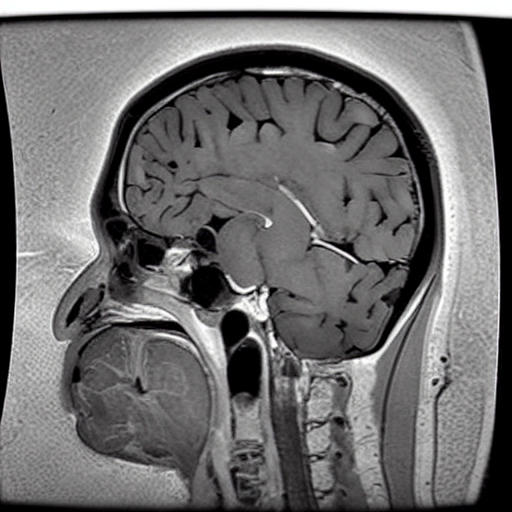

In [45]:
prompt = "a medical brain MRI image, grayscale, axial view, high resolution"
negative_prompt = "cartoon, colorful, painting, illustration, low quality, distorted"

image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=30,
    guidance_scale=7.5
).images[0]

image


  0%|          | 0/40 [00:00<?, ?it/s]

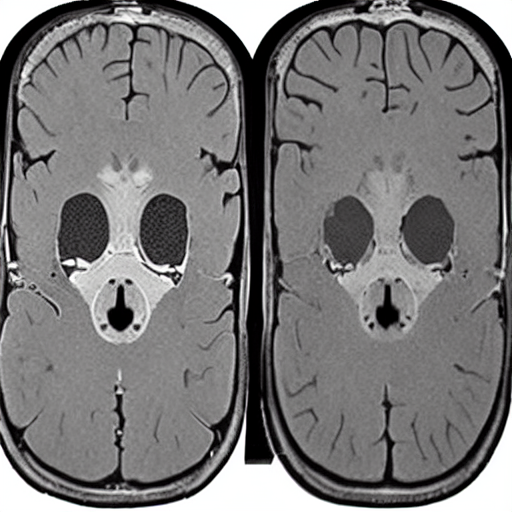

In [46]:
prompt = (
    "clinical brain MRI scan, axial slice, T1-weighted, "
    "grayscale, radiology image, hospital equipment, "
    "realistic medical imaging, symmetric brain anatomy"
)

negative_prompt = (
    "cartoon, illustration, painting, artistic, colorful, "
    "fantasy, unreal, distorted anatomy, extra brain, text"
)

image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=40,
    guidance_scale=6.5
).images[0]

image


In [47]:
import json

fixed_lines = []

with open("metadata.jsonl", "r") as f:
    for line in f:
        item = json.loads(line)

        # handle both possible keys
        fname = item.get("image") or item.get("file_name")
        fname = fname.lower()

        caption = "clinical brain MRI scan, grayscale, "

        # Sequence type
        if "t1" in fname:
            caption += "T1-weighted, "
        elif "t2" in fname:
            caption += "T2-weighted, "
        elif "flair" in fname:
            caption += "FLAIR sequence, "

        # Orientation
        if "axial" in fname:
            caption += "axial view"
        elif "coronal" in fname:
            caption += "coronal view"
        elif "sag" in fname or "sagittal" in fname:
            caption += "sagittal view"
        else:
            caption += "axial slice"

        fixed_lines.append(json.dumps({
            "image": item.get("image") or item.get("file_name"),
            "text": caption
        }))

with open("metadata_v2.jsonl", "w") as f:
    for l in fixed_lines:
        f.write(l + "\n")

print("metadata_v2.jsonl created ✔")


metadata_v2.jsonl created ✔


In [48]:
!mkdir -p dataset_v2
!mv metadata_v2.jsonl dataset_v2/



In [49]:
from datasets import load_dataset, Image

ds = load_dataset("json", data_files="dataset_v2/metadata_v2.jsonl", split="train")

ds = ds.cast_column("image", Image())

ds.save_to_disk("dataset_v2_ready")


Generating train split: 0 examples [00:00, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/5712 [00:00<?, ? examples/s]

In [50]:
import os
print(os.listdir())



['diffusers', 'dataset_v2', 'brain_mri_images', 'dataset_v2_ready', 'metadata.jsonl', 'brain_mri_lora.zip', 'brain_mri_lora', 'metadata_fixed.jsonl', '.virtual_documents']


In [51]:
import os, shutil

os.makedirs("dataset_v2_ready/train", exist_ok=True)

for f in os.listdir("dataset_v2_ready"):
    if f != "train":
        shutil.move(f"dataset_v2_ready/{f}", "dataset_v2_ready/train")


In [52]:
import shutil

shutil.move("brain_mri_images", "dataset_v2_ready/train/brain_mri_images")



'dataset_v2_ready/train/brain_mri_images'

In [53]:
for root, dirs, files in os.walk("dataset_v2_ready", topdown=True):
    print(root, "->", len(files), "files")


dataset_v2_ready -> 0 files
dataset_v2_ready/train -> 4 files
dataset_v2_ready/train/brain_mri_images -> 5712 files


In [54]:
import os

print(os.listdir("dataset_v2_ready/train"))



['brain_mri_images', 'state.json', 'data-00001-of-00002.arrow', 'data-00000-of-00002.arrow', 'dataset_info.json']


In [55]:
from datasets import load_from_disk

ds = load_from_disk("dataset_v2_ready/train")
print(ds)
print(ds.column_names)


Dataset({
    features: ['image', 'text'],
    num_rows: 5712
})
['image', 'text']


In [62]:
import json, os

BASE = "dataset_v2_ready/train/"   # <-- important

good = []
bad = []

with open("metadata_fixed.jsonl", "r") as f:
    for line in f:
        item = json.loads(line)

        path = item["image"]

        # add folder prefix if missing
        if not path.startswith(BASE):
            path = os.path.join(BASE, path)

        item["image"] = path

        if os.path.exists(path):
            good.append(item)
        else:
            bad.append(path)

print("Missing after fix:", len(bad))
print("Keeping after fix:", len(good))

with open("metadata_clean.jsonl", "w") as f:
    for item in good:
        f.write(json.dumps(item) + "\n")


Missing after fix: 0
Keeping after fix: 5712


In [65]:
from datasets import load_from_disk

ds = load_from_disk("dataset_v2_ready/train")
print(ds.column_names)
ds[0]


['image', 'text']


{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>,
 'text': 'clinical brain MRI scan, grayscale, axial slice'}

In [72]:
from datasets import load_from_disk

ds = load_from_disk("dataset_v2_ready/train")
print(ds)
print(ds.column_names)
print(ds[0])



Dataset({
    features: ['image', 'text'],
    num_rows: 5712
})
['image', 'text']
{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7AAECB38DB50>, 'text': 'clinical brain MRI scan, grayscale, axial slice'}


In [84]:

import json, itertools

with open("metadata_clean.jsonl") as f:
    for line in itertools.islice(f, 3):
        print(line.strip())



{"image": "dataset_v2_ready/train/brain_mri_images/brain_2876.png", "text": "a medical brain MRI image"}
{"image": "dataset_v2_ready/train/brain_mri_images/brain_2494.png", "text": "a medical brain MRI image"}
{"image": "dataset_v2_ready/train/brain_mri_images/brain_4458.png", "text": "a medical brain MRI image"}


In [91]:
import shutil

shutil.copy("metadata_clean.jsonl",
            "dataset_v2_ready/train/metadata.jsonl")




'dataset_v2_ready/train/metadata.jsonl'

In [94]:
!accelerate launch diffusers/examples/text_to_image/train_text_to_image_lora.py \
  --pretrained_model_name_or_path=runwayml/stable-diffusion-v1-5 \
  --train_data_dir="dataset_v2_ready/train" \
  --image_column="image" \
  --caption_column="text" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --learning_rate=1e-4 \
  --max_train_steps=800 \
  --output_dir=brain_mri_lora_v3



/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 